### Elements of k-means and PCA, and applications.
 - Simple k-menas
 - Simple pca
 - pca on Iris data set
 - pca on MNIST
 - k-means on MNIST in two dimensions
## #Simple case of k-means

In [1]:
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))

(-5.0, 5.0)

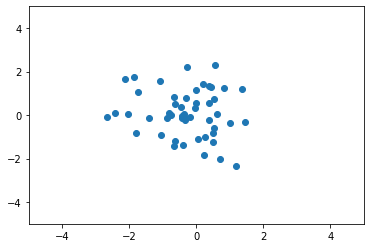

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.xlim([-5,5])
plt.ylim([-5,5])

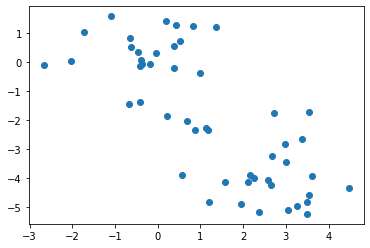

In [4]:
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

plt.scatter(X[:,0],X[:,1])

### Dividing data into clusters.
### K = 2

In [8]:
#from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2


#km1 = KMeans(n_clusters=2, n_init=1)
#km1.fit(X)

centers, labels = kmeans2(X, 2, minit='points') 

### Outputs from k-means: coordinates of cluster centers, and assignment for each data

In [9]:
centers

array([[ 2.46480671, -3.74242216],
       [-0.28003288,  0.2418374 ]])

In [10]:
len(X)

50

In [11]:
len(labels)

50

In [12]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

### K = 3

In [13]:
#np.random.seed(4)

centers2, labels2 = kmeans2(X, 3, minit='points') 

#km2 = KMeans(n_clusters=3, n_init=20)
#km2.fit(X)

In [14]:
labels2

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [17]:
centers2

array([[-0.34608792,  0.5592591 ],
       [ 1.02816755, -1.75457021],
       [ 2.68585808, -4.2173028 ]])

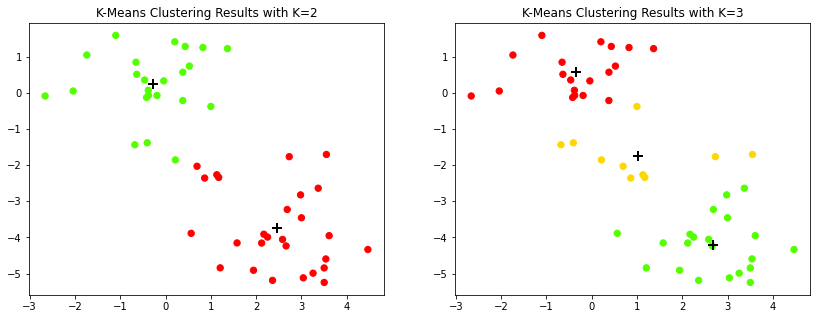

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(centers[:,0], centers[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=labels2, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(centers2[:,0], centers2[:,1], marker='+', s=100, c='k', linewidth=2);

## Using PCA to visualize Iris data set
### Originally, the data set is used for classification, meaning that the machine learning model tries to label each data x. In Iris data set, there are 150 rows and 4 columns. In summary:
- Each data has 4 features
- Each y can be 0, 1, 2 (corresponds to a certain kind of flower)
- It would be hard to plot 4-dimensional data and group them into 3 clusters

### If we can extract two important predictos, that will be great. In general, we can write linear combination of the four predictors such as:

 - $z_1 = a_{11}x_1+a_{12}x_2+a_{13}x_3+a_{14}x_4$, 
 - $z_2 = a_{21}x_1+a_{22}x_2+a_{23}x_3+a_{24}x_4$,
 - $z_3 = a_{31}x_1+a_{32}x_2+a_{33}x_3+a_{34}x_4$,
 - $z_4 = a_{41}x_1+a_{42}x_2+a_{43}x_3+a_{44}x_4$.

### What PCA does is: find out the coefficients $a_{ij}$ such that $z_1$ contains the largest variance. $z_2$ second, $z_3$ third, and so on.



In [19]:
from sklearn.decomposition import PCA

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

np.unique(y_iris)

array([0, 1, 2])

In [21]:
model_iris = PCA(n_components=2)
model_iris.fit(X_iris)

PCA(n_components=2)

In [22]:
X_transform = model_iris.transform(X_iris)

In [23]:
X_iris[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [24]:
X_transform[0:5,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

### Compare the X_iris and X_transform, the original data has 4 columns (each x has 4 components) and the transformed one has only 2. So we can plot the transformed data in two dimension. It shall help us visualize them and classify the data.

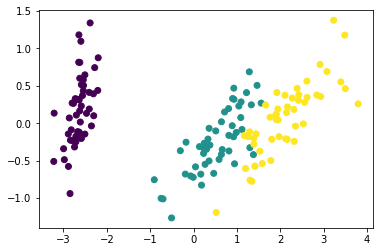

In [29]:
plt.scatter(X_transform[:,0], X_transform[:,1], c= y_iris)

## Applying PCA to visualize hand-written digits
 - A very well known data set: MINST hand-written digit image dataset
 - Use PCA to visualize images in two dimensional space
 - Task I: Build a pandas data frame for the image data
 - Task II: Select s subset of digits from data frame. Here the demo selects the 4 digits: '0', '4','6','9'. 
 - Task III: Use PCA and visualize these images using the first two coordinates.
 - Your task: Repeat the above to visualize any 4 of remaining digits you preferred. 

In [30]:
from sklearn.datasets import load_digits

In [28]:
digits = load_digits()
print(digits.data.shape)

# There are 1797 images of digits from 0 to 9
# each image is saved as a row of 8x8=64 columns 

(1797, 64)


### The method .matshow is used to show the 8x8 images

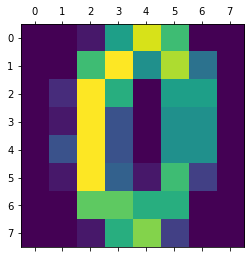

[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
0


In [31]:
#plt.gray() 
plt.matshow(digits.images[10]) 
plt.show() 

# look into the object

# .data contains the information of image reshaped into a row of 64 columns
print(digits.data[10])

# .image is a matrix of 8x8 identical to .data
print(digits.images[10])

# .target contains the label for the digit
print(digits.target[10])

## Building the data frame for MNIST
 - Each image is stored in a row
 - Each image has 64 pixels, so each column represents a pixel
 - The last column stores the target, i.e. 0, 1, 2, ...

In [32]:
feat_cols = [ 'pixel'+str(i) for i in range(digits.data.shape[1]) ]
df = pd.DataFrame(digits.data,columns=feat_cols)
df['label'] = digits.target
#df['label'] = df['label'].apply(lambda i: str(i))

In [31]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Randomly select 30 images from the data frame and show the images

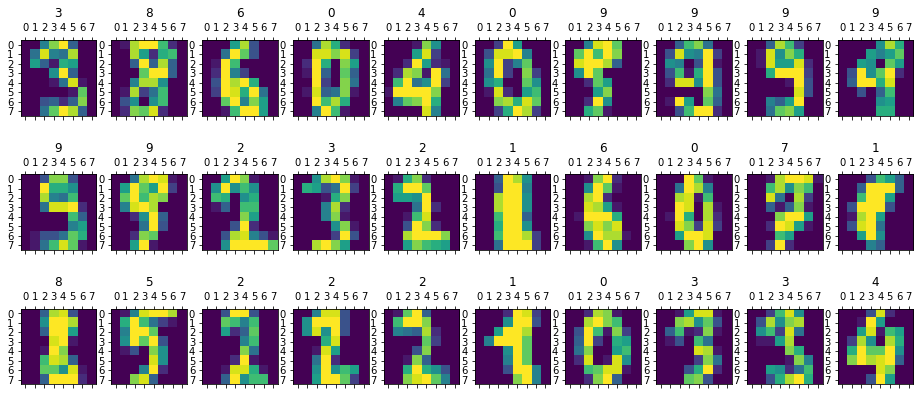

In [33]:
rndperm = np.random.permutation(df.shape[0])

fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((8,8)).astype(float))
plt.show()

## Select a subset of digits from the original dataset

In [34]:
# select digits from the data,
#df_1 = df.loc[df['label'].isin(['0','4','6','9'])]

df_1 = df.loc[df['label'].isin([0,4,6,9])]

df_1.shape

(720, 65)

In [35]:
df_1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0


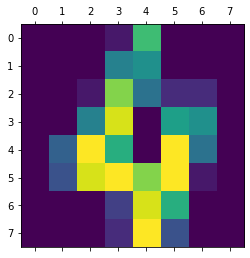

4


In [38]:
plt.matshow(df_1.iloc[1,0:64].values.reshape((8,8)).astype(float))
plt.show()
print(df_1.iloc[1,64])

### Applying PCA. The purpose: find lower dimensional representation of image data

In [37]:
# The last column is not part of data so we drop it
X = df_1.iloc[:,:-1]

# Only 720 images are selected, each has 8x8=64 pixels
X.shape

(720, 64)

In [39]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [38]:
X_transform = pca.transform(X)

In [39]:
X_transform[1,:]

array([-18.0017731 ,  11.60434183])

### What do the above numbers mean? They represent the new coordinate in the transformed system.
 - PCA is to transform the original 64 dimensional space into a new 64 dimensional space
 - The first axis in the transformed space represent the direction along which the variation is the largest
 - The first number in above array is the first coordinate
 - The second number is the second coordinate
 - We will use the two numbers to represent the image

## Below we can visualize the 64 dimensional data using the first two numbers

In [40]:
X_transform.shape

(720, 2)

In [41]:
len(df_1.label.values)

720

In [42]:
color_list = ['k' if label == 0 else 'b' if label == 4 else 'g' if label == 6 else 'r' 
              for label in df_1.label.values]

In [43]:
#len(color_list)

In [44]:
df_1['color'] = color_list

/Users/felix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label,color
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,k
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,b
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6,g
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9,r
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0,k


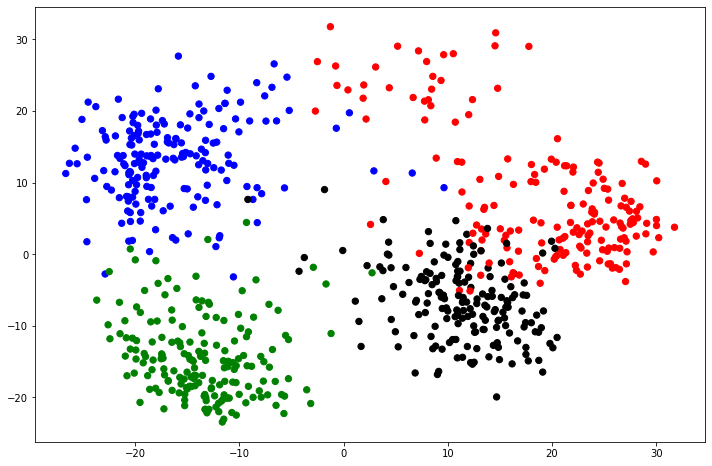

In [54]:
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(X_transform[:,0], X_transform[:,1], s=40, c=df_1.color) 
#plt.legend(loc="upper left")
#plt.gca().legend(('0','4','6','9'))

### Analysis
 - Square and circle are quite separatable, meaning that pca makes it easy to tell 4 from 6
 - Cross and triangle are somewhat entangled. It is not surprising because 0 and 9 are more mistakable.
 - Basically, the 4 clusters are well formed, meaning that we can apply k-means to classify the MNIST images.

## K-means to classify the hand-written digits
### The important parameters and methods in k-means
 - n_clusters: number of clusters (K in video). Here, we select K = 4
 - n_init: number of iteration in the k-means algorithm. Check the video and slides for details. Here, we set it to be 02
 - .fit: the main function of k-means. We need to plug the transformed data.
 - .labels_: to return the cluster assignment of each data point.
 - .cluster_centers_: return the coordinate. With this information, we can find out the correspondence between cluster label and digit label

In [55]:
#km1 = KMeans(n_clusters=4, n_init=20)
#km1.fit(X_transform)


center_digits, index_digits = kmeans2(X_transform, 4, minit='points')

In [56]:
len(index_digits)

720

In [57]:
center_digits

array([[  4.91300257,  21.66429394],
       [-13.30368994, -14.52358177],
       [-17.26564196,  12.59219996],
       [ 16.25926439,  -1.92817885]])

In [58]:
type(index_digits)

numpy.ndarray

### Add a new column of kmeans cluster index to data frame 1

In [59]:
df_1['kmeans_index'] = index_digits

/Users/felix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df_1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label,color,kmeans_index
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,k,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,b,2
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6,g,1
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9,r,3
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0,k,3


### Analyze the relation between cluster index and the original label (0, 4, 6, 9)

In [62]:
set(df_1.loc[df_1.kmeans_index==0].label)

{0, 4, 9}

In [65]:
df_1.loc[df_1.kmeans_index==0].label.nunique()

3

In [66]:
df_1.loc[df_1.kmeans_index==0].label.value_counts()

9    37
4    11
0     1
Name: label, dtype: int64

In [68]:
df_1.loc[df_1.kmeans_index==0].label.value_counts().idxmax()

9

In [69]:
df_1.loc[df_1.kmeans_index==1].label.value_counts().idxmax()

6

In [70]:
df_1.loc[df_1.kmeans_index==2].label.value_counts().idxmax()

4

In [71]:
df_1.loc[df_1.kmeans_index==3].label.value_counts().idxmax()

0

## Using cluster index as prediction for digit image 

In [73]:
kmeans_map_list = [df_1.loc[df_1.kmeans_index==i].label.value_counts().idxmax() for i in range(4)]

In [74]:
kmeans_map_list

[9, 6, 4, 0]

In [79]:
df_1.iloc[1]['kmeans_index']

2

In [81]:
kmeans_pred_list = [kmeans_map_list[df_1.iloc[i]['kmeans_index']] for i in range(df_1.shape[0])]

In [84]:
df_1['kmeans_pred'] = kmeans_pred_list

/Users/felix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
df_1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label,color,kmeans_index,kmeans_pred
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,6.0,13.0,10.0,0.0,0.0,0.0,0,k,3,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,16.0,4.0,0.0,0.0,4,b,2,4
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,1.0,9.0,15.0,11.0,3.0,0.0,6,g,1,6
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,9.0,12.0,13.0,3.0,0.0,0.0,9,r,3,0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,1.0,10.0,13.0,3.0,0.0,0.0,0,k,3,0


In [88]:
color_list2 = ['k' if label == 0 else 'b' if label == 4 else 'g' if label == 6 else 'r' 
              for label in df_1.kmeans_pred.values]

df_1['color2'] = color_list2

/Users/felix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Two visualizations with color using original label and cluster index

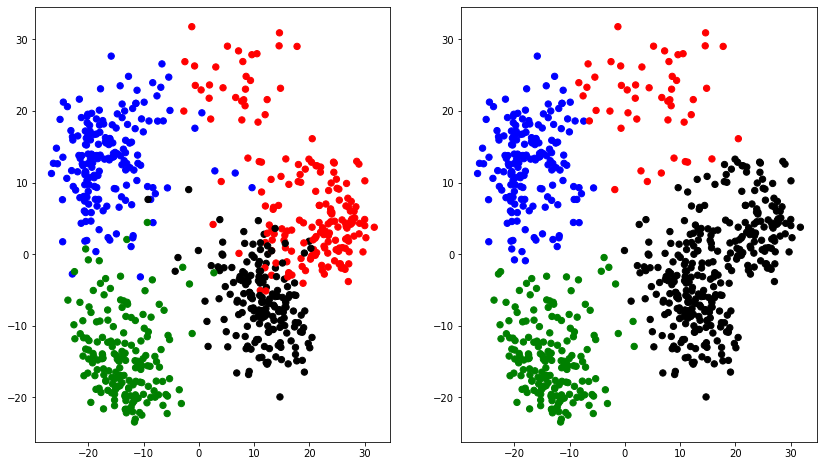

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))

ax1.scatter(X_transform[:,0], X_transform[:,1], s=40, c=df_1.color) 
#ax1.set_title('K-Means Clustering Results with K=2')
#ax1.scatter(centers[:,0], centers[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X_transform[:,0], X_transform[:,1], s=40, c=df_1.color2) 
#ax2.set_title('K-Means Clustering Results with K=3')
#ax2.scatter(centers2[:,0], centers2[:,1], marker='+', s=100, c='k', linewidth=2);

## Checking the prediction performance 

In [92]:
from sklearn.metrics import classification_report

print(classification_report(df_1.label,df_1.kmeans_pred))

              precision    recall  f1-score   support

           0       0.54      0.97      0.69       178
           4       0.97      0.92      0.94       181
           6       0.97      0.97      0.97       181
           9       0.76      0.21      0.32       180

    accuracy                           0.77       720
   macro avg       0.81      0.77      0.73       720
weighted avg       0.81      0.77      0.73       720

